# Lab: K-Nearest Neighbors
---

The KNN Algorithm is a **Supervised Learning** classification algorithm.

In the practice section you will learn how to predict breast cancer using a **KNN** model.

Your task in this lab you will be using the **KNN** model to classify images of handwritten numbers from the MNIST dataset.



### **The steps of using a machine learning model:**

1. Load in the data
2. Decide which features will be used as the predictors (the X values), and which feature you want to predict (the y values)
3. Perform a test, train split to create a testing dataset and a training dataset.
4. Import an ML algorithm
5. Initialise the model
6. Fit the model on the training set
7. Draw a visualisation (if applicable to the model)
8. Test the model on the test set and evaluate the performance
9. Use your Model

## Part 1: Practice Together
---

### **Step \#0: Import the following before continuing**
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection

### **Step \#1: Load the data**
---

The following dataset is taken from the UCI ML Breast Cancer Wisconsin (Diagnostic) dataset and contains information mamography exams reults and whether or not cancer was detected.

In [ ]:
cancer_dataset = datasets.load_breast_cancer()
df = pd.DataFrame(data=cancer_dataset.data, columns=cancer_dataset.feature_names)
df['TARGET'] = cancer_dataset.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TARGET
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### **Part \#2: Decide independent and dependent variables**
---
##### *Decide which features will be used as the predictors (the X values), and which feature you want to predict (the y values)*


To simplify our **KNN** fitting we will focus on four features to fit our binary classifier.

We will fit our **KNN** classifier using "mean radius", "mean texture", "mean perimeter", and "mean area" features in order to predict whether the patient has breast cancer.

In [ ]:
# Slice our dataset to view the features we care about
df[["mean radius","mean texture", "TARGET"]]

,mean radius,mean texture,TARGET
0,17.99,10.38,0
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,0
4,20.29,14.34,0
...,...,...,...
564,21.56,22.39,0
565,20.13,28.25,0
566,16.60,28.08,0
567,20.60,29.33,0


### **Part #2.1: Visualize the variables you'll be using**
---

Since we are building a classifier it can be useful to look at some of the variables and color the scatter plot depending on the value of the target.

Below we will look at `"mean radius"` and  `"mean texture"` and see if there is a correlation with the detection of cancer.

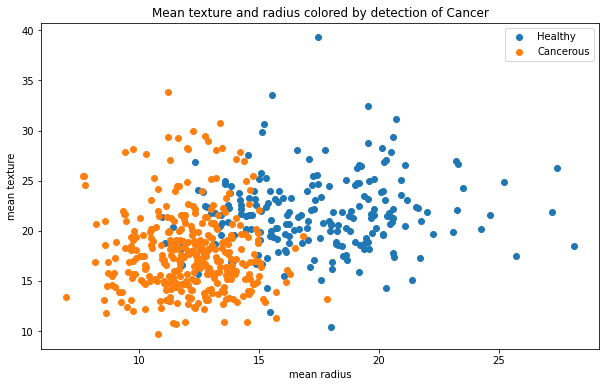

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

for label, data in df.groupby('TARGET'):
    ax.scatter(data["mean radius"], data["mean texture"], label=["Healthy", "Cancerous"][label])

ax.set_title("Mean texture and radius colored by detection of Cancer")
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.legend()
plt.show()

### **Part \#3: Split data into training and testing data**
---


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[["mean radius","mean texture"]],
                                                                    df[["TARGET"]], test_size=0.2, random_state=42)

### **Step \#4: Import an ML algorithm (Using Sklearn algorithms)**
---
 

Steps for creating a KNN Model:

1. Import the algorithm from the correct Sklearn module:
  ```python
  # import the KNN algorithm
  from sklearn.neighbors import KNeigborsClassifier
  ```

2. Initialize the model
  ```python
  # Initialize the model
  model = KNeigborsClassifier()
  ```

3. Fit the model to the training data
  ```python
  # fit the model to the training data
  model.fit(X_train, y_train)
  ```

4. Use the model to predict a class based on new data
  ```python
  # Use the model to predict
  prediction = model.predict(x)
  ```


In [ ]:
# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

### **Step \#5: Initialize your model**
---

Remember to set the *hyperparameter* `n_neighbors`!

In [ ]:
# initialize
model = KNeighborsClassifier(n_neighbors = 4)

### **Step \#6: Fit your model and make a prediction**
---

In [ ]:
# fit
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [ ]:
# predict
pred = model.predict(X_test)

### **Step \#7: Visualize Data and the decision boundary**
---

We can now use a colormesh plot to show the decision boundary of the KNN model.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


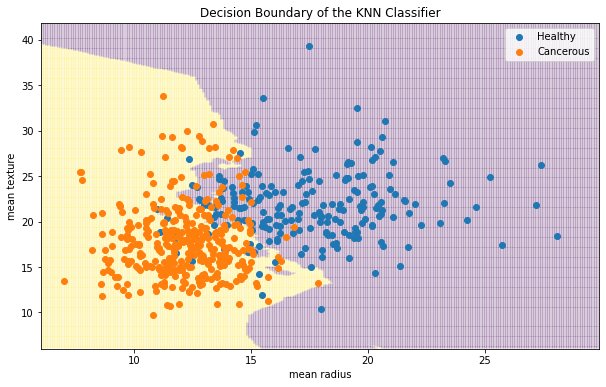

In [ ]:
# Make the same scatter plot of the training data

fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(6, 30, 0.1),
                     np.arange(6, 42, 0.1))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in df.groupby('TARGET'):
    ax.scatter(data["mean radius"], data["mean texture"], label=["Healthy", "Cancerous"][label])

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.legend()
plt.show()

### **Step \#8: Use the following code to test the accuracy of your model**
---

In [ ]:
from sklearn.metrics import mean_squared_error, classification_report
print('Mean squared error: ', mean_squared_error(y_test, pred))

print(f'Percentage of correct predictions on test set: {sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100} %')

Mean squared error:  0.09649122807017543
Percentage of correct predictions on test set: 90.35087719298247 %


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        43
           1       0.95      0.89      0.92        71

    accuracy                           0.90       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



### **Step \#9:** Use the model
---


1. Does your model think that a patient with mean radius `15.5` and mean texture `31.2` have cancer?
2. Does your model think that a patient with mean radius `12.2` and mean texture `34.5` have cancer?


In [ ]:
patient1 = pd.DataFrame([[15.5, 31.2]], columns=["mean radius", "mean texture"])
prediction = model.predict(patient1)[0]
print(f"Patient 1 {['is not likely', 'is likely'][prediction]} to have cancer")

patient2 = pd.DataFrame([[12.2, 34.5]], columns=["mean radius", "mean texture"])
prediction = model.predict(patient2)[0]
print(f"Patient 2 {['is not likely', 'is likely'][prediction]} have cancer")

Patient 1 is not likely to have cancer
Patient 2 is likely have cancer


### **Optional:** Hyperparameter Tuning

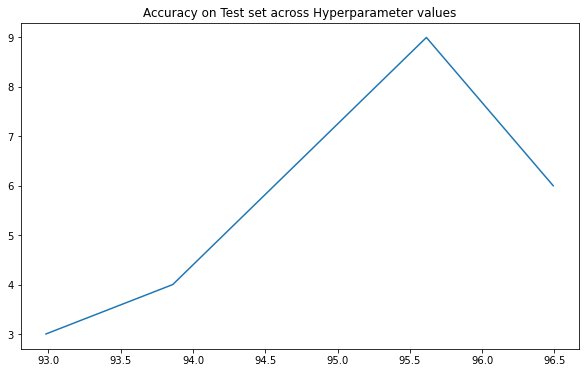

Top score of optimal classifier: 96.49%
Best Value of N to use: 6


In [ ]:
# Now lets see how accurate it is looking at all 30 variables

# Load all columns of the dataset
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                      df.drop("TARGET", axis=1), df[["TARGET"]],
                                      test_size=0.2, random_state=42)

# Hyperparameter tuning
scores = {}
for n in range(1,10):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[score] = n
    
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Accuracy on Test set across Hyperparameter values")
ax.plot(list(scores.keys()), list(scores.values()))
plt.show()

top_score = max(scores.keys())
print(f"Top score of optimal classifier: {top_score:.2f}%")
print(f"Best Value of N to use: {scores[top_score]}")

## Part 2: Independent Work
---

### **Step \#0: Import the following before continuing**
---

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, model_selection
from sklearn.model_selection import train_test_split

### **Step \#1: Load the data**
---

The following dataset is taken from the UCI ML Wine Recognition dataset and contains the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators

In [6]:
data = pd.read_csv("glass.csv")
data['TARGET'] = data.Type.values
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
 10  TARGET  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,TARGET
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000,7.000000


### **Part \#2: Decide independent and dependent variables**
---
##### *Decide which features will be used as the predictors (the X values), and which feature you want to predict (the y values)*

In our **KNN** fitting we will focus on all the chemical features of the glass in a multi-dimensional **KNN** model.


### **Part #2.1: Visualize the variables you'll be using**
---

Since we are building a classifier it can be useful to look at some of the variables and color the scatter plot depending on the value of the target.

Below we will look at `"malic acid"` and  `"color intensity"` and see if there is a correlation with the cultivator number.

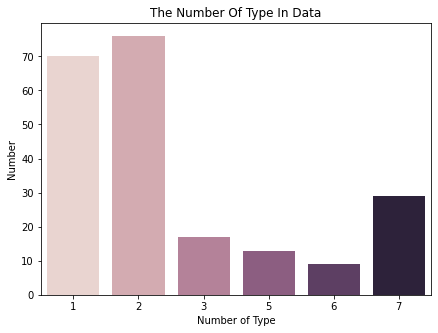

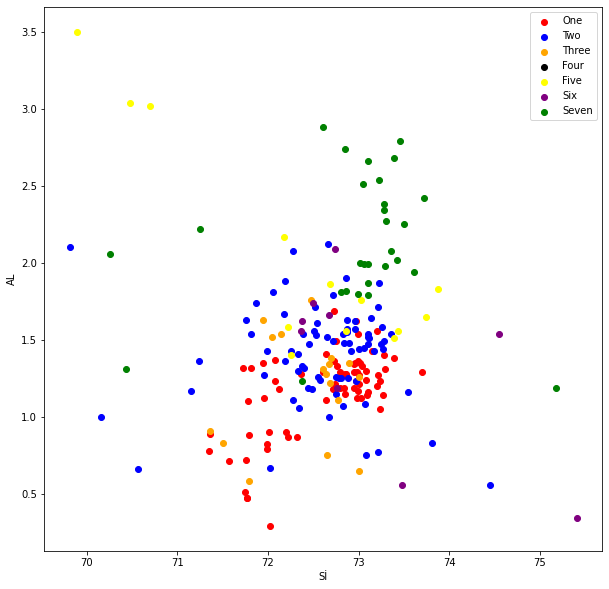

In [9]:
dataType = data["Type"].value_counts(dropna=False)
dataTypedf = np.array(dataType)
x = list(dataTypedf)
y = data.Type.value_counts().index

plt.figure(figsize=(7,5))
sns.barplot(x = y, y = x, palette = sns.cubehelix_palette(len(x)))
plt.xlabel("Number of Type")
plt.ylabel("Number")
plt.title("The Number Of Type In Data")
plt.show()

One = data[data.Type == 1]
Two = data[data.Type == 2]
Three = data[data.Type == 3]
Four = data[data.Type == 4]
Five = data[data.Type == 5]
Six = data[data.Type == 6]
Seven = data[data.Type == 7]

plt.figure(figsize=(10,10))
plt.scatter(One.Si, One.Al, color = "red", label = "One")
plt.scatter(Two.Si, Two.Al, color = "blue", label = "Two")
plt.scatter(Three.Si, Three.Al, color = "orange", label = "Three")
plt.scatter(Four.Si, Four.Al, color = "black", label = "Four")
plt.scatter(Five.Si, Five.Al, color = "yellow", label = "Five")
plt.scatter(Six.Si, Six.Al, color = "purple", label = "Six")
plt.scatter(Seven.Si, Seven.Al, color = "green", label = "Seven")
plt.xlabel("Sİ")
plt.ylabel("AL")
plt.legend()
plt.show()

### **Part \#2.2 Normalize data**
Normalize the data and prepare the data for splitting into training and testing data. 

In [11]:
x_data = data.drop(["Type"],axis = 1)
y_data = data.Type.values

x_data = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values
x_data

c:\Users\Brian Liu\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Brian Liu\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TARGET
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0,1.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0,1.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0,1.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0,1.0


### **Part \#3: Split data into training and testing data**
---


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

### **Step \#4: Import an ML algorithm (Using Sklearn algorithms)**
---
 

Steps for creating a KNN Model:

1. Import the algorithm from the correct Sklearn module:
  ```python
  # import the KNN algorithm
  from sklearn.neighbors import KNeigborsClassifier
  ```

2. Initialize the model
  ```python
  # Initialize the model
  model = KNeigborsClassifier()
  ```

3. Fit the model to the training data
  ```python
  # fit the model to the training data
  model.fit(X_train, y_train)
  ```

4. Use the model to predict a class based on new data
  ```python
  # Use the model to predict
  prediction = model.predict(x)
  ```


In [25]:
# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

### **Step \#5: Initialize your model**
---

Remember to set the *hyperparameter* `n_neighbors`!

In [26]:
# initialize
model = KNeighborsClassifier(n_neighbors = 7)

### **Step \#6: Fit your model and make a prediction**
---

In [27]:
# fit
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [28]:
# predict
pred = model.predict(x_test)
print("{} knn score: {}".format(7,model.score(x_test, y_test)))

7 knn score: 0.8615384615384616


### **Step \#8: Use the following code to test the accuracy of your model**
---

In [29]:
from sklearn.metrics import mean_squared_error, classification_report
print('Mean squared error: ', mean_squared_error(y_test, pred))

# print(f'Percentage of correct predictions on test set: {sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100} %')

Mean squared error:  0.13846153846153847


In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.86      1.00      0.93        19
           2       0.95      0.87      0.91        23
           3       1.00      0.75      0.86         4
           5       1.00      0.83      0.91         6
           6       0.25      0.33      0.29         3
           7       0.80      0.80      0.80        10

    accuracy                           0.86        65
   macro avg       0.81      0.76      0.78        65
weighted avg       0.88      0.86      0.87        65



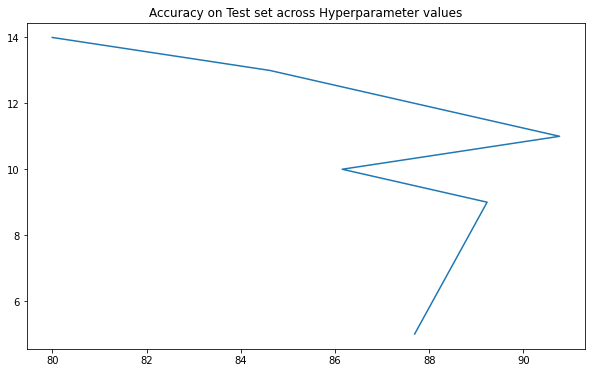

Top score of optimal classifier: 90.77%
Best Value of N to use: 11


In [35]:
"""test_score_list = []
train_score_list = []

for i in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    test_score_list.append(knn2.score(x_test, y_test))
    train_score_list.append(knn2.score(x_train, y_train))
    
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_score_list,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_score_list,marker='o',label='Test Score')
"""
scores = {}
for n in range(5,15):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(x_train, y_train.reshape(-1))
    pred = full_model.predict(x_test)
    score = sum(pred == y_test.reshape(-1))/len(pred)* 100
    scores[score] = n
    
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Accuracy on Test set across Hyperparameter values")
ax.plot(list(scores.keys()), list(scores.values()))
plt.show()

top_score = max(scores.keys())
print(f"Top score of optimal classifier: {top_score:.2f}%")
print(f"Best Value of N to use: {scores[top_score]}")

In [37]:
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(5,20)}

knn3 = KNeighborsClassifier()
knn_cv= GridSearchCV(knn3,param_grid,cv=5)
knn_cv.fit(x_test,y_test)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8153846153846154
Best Parameters: {'n_neighbors': 6}


C:\Users\Brian Liu\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


### **Step \#9:** Use the model
---


Who is likely to have cultivated a wine with `malic_acid = 4.1` and `color_intensity = 1.1` ?

In [38]:
#unknown_wine = pd.DataFrame([[4.1, 1.1]], columns=["malic_acid", "color_intensity"])
#prediction = model.predict(unknown_wine)[0]
#print(f"Wine is likely from {['cultivator 1', 'cultivator 2', 'cultivator 3'][prediction]} ")